In [1]:
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Ouvrir le fichier
fichier = open(r"C:\Users\hadrien\Documents\Personnel\formation data\Projet\livre eng\The-Lord-of-the-Rings-Illustrated-Ed...-Z-Library.txt", 'r', encoding='utf-8')

# Lire les 24000 premières lignes du fichier
nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne

# Fermer le fichier après avoir lu les lignes nécessaires
fichier.close()


In [3]:
#Dictionnaire NLP spacy:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3100000
# Traiter le texte avec spaCy
doc = nlp(texte)

# Identifier les entités nommées (personnages)
personnages = set()
for ent in doc.ents:
    if ent.label_ == "PERSON": 
        personnages.add(ent.text)


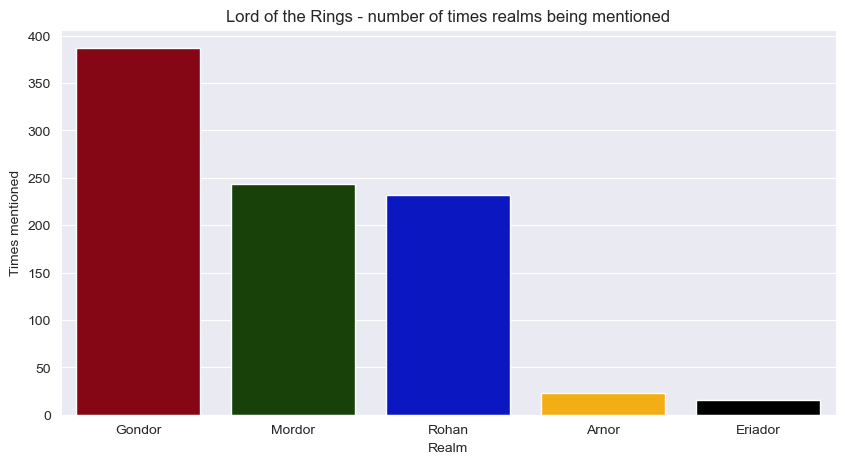

In [4]:

#Tableau occurences lieu:
Eriador = texte.count("Eriador")
Arnor = texte.count("Arnor")
Rohan = texte.count("Rohan")
Gondor = texte.count("Gondor")
Mordor = texte.count("Mordor")
realms_list = [['Gondor', Gondor], ['Mordor', Mordor], ['Rohan', Rohan], ['Arnor', Arnor], ['Eriador', Eriador]]
df_realms=pd.DataFrame(realms_list, columns=['Realm', 'Times mentioned'])
colors = ["crimson", "forrest green", "true blue", "amber", "black"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="Realm", y="Times mentioned", saturation=0.9, data=df_realms).set_title("Lord of the Rings - number of times realms being mentioned")



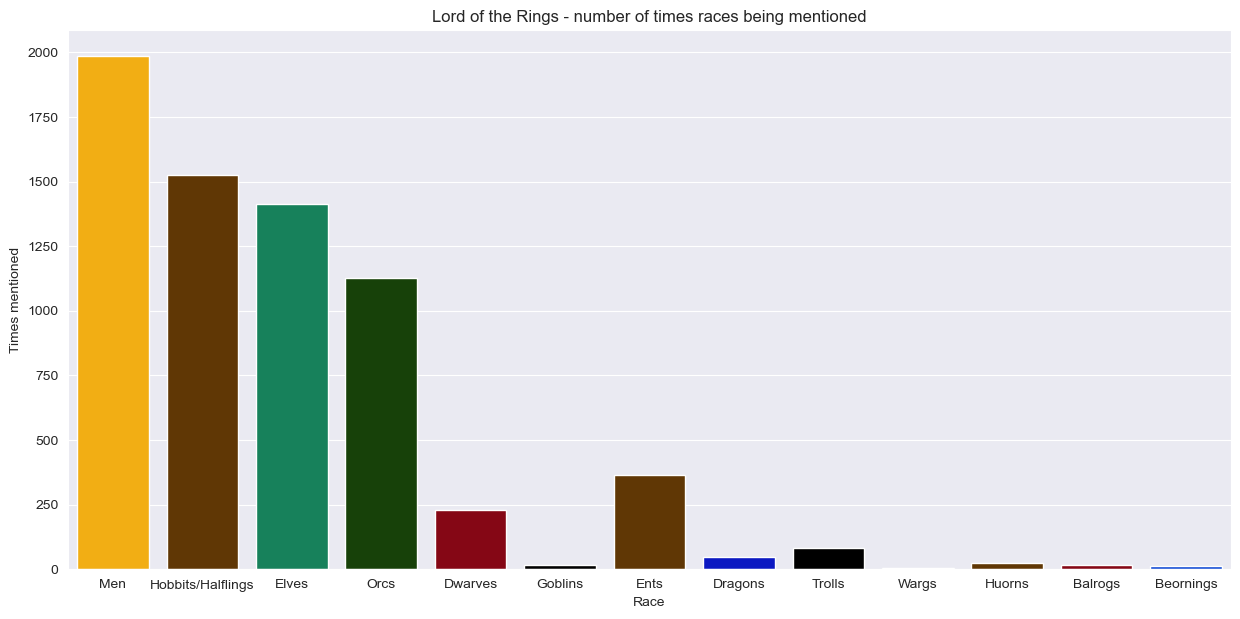

In [5]:

#tableau occurence race:
Orc = texte.count("Orc")+texte.count("Orcs")+texte.count("orc")+texte.count("orcs")+texte.count("orcish")
Human = texte.count("Man")+texte.count("Mankind")+texte.count("Men")+texte.count("men")+texte.count("human")
Elf = texte.count("Elf")+texte.count("Elves")+texte.count("elf")+texte.count("elves")+texte.count("elven")
Dwarf = texte.count("Dwarf")+texte.count("Dwarves")+texte.count("dwarf")+texte.count("dwarves")+texte.count("dwarven")
Halfling = texte.count("Halfling")+texte.count("Hobbit")+texte.count("Hobbits")+texte.count("Halflings")+texte.count("halfling")+texte.count("hobbit")+texte.count("hobbits")+texte.count("halflings")
Ent = texte.count("Ents")+texte.count("Ent")
Troll = texte.count("Troll")+texte.count("troll")+texte.count("Trolls")+texte.count("trolls")
Dragon = texte.count("dragon")+texte.count("dragons")+texte.count("Dragon")+texte.count("Dragons")
Balrog = texte.count("Balrog")+texte.count("Balrogs")+texte.count("balrog")+texte.count("balrogs")
Goblin = texte.count("Goblin")+texte.count("Goblins")+texte.count("goblin")+texte.count("goblins")
Warg = texte.count("Warg")+texte.count("Wargs")+texte.count("warg")+texte.count("wargs")
Huorn =texte.count("Huorn")+texte.count("Huorns")+texte.count("huorn")+texte.count("huorns")
Beorning = texte.count("Beorning")+texte.count("Beornings")+texte.count("beorning")+texte.count("beornings")+texte.count("Skin-changers")+texte.count("Skin-changer")+texte.count("skin-changer")+texte.count("skin-changers")
races_list = [['Men', Human], ['Hobbits/Halflings', Halfling], ['Elves', Elf], ['Orcs', Orc], ['Dwarves', Dwarf],  ['Goblins', Goblin], ['Ents', Ent], ["Dragons", Dragon], ['Trolls', Troll], ["Wargs", Warg], ['Huorns', Huorn], ["Balrogs", Balrog], ["Beornings", Beorning]]
df_races=pd.DataFrame(races_list, columns=['Race', 'Times mentioned'])
colors = ["amber", "brown", "dark sea green", "forrest green", "crimson", "black",  "brown", "true blue", "black", "forrest green", "brown", "crimson", "blue"]
sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
with sns.xkcd_palette(colors):
    sns.barplot(x="Race", y="Times mentioned", saturation=0.9, data=df_races).set_title("Lord of the Rings - number of times races being mentioned")



In [6]:
#Fonction analyse de sentiment spacy:
def analyze_sentiment(text):
    # Utilisation de SpaCy pour obtenir les lemmes des mots
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    # Utilisation de TextBlob pour l'analyse de sentiments
    blob = TextBlob(lemmatized_text)
    sentiment_score = blob.sentiment.polarity
    
    return sentiment_score
 
    
sentences = nltk.sent_tokenize(texte)



In [8]:

# Liste des personnages
personnages = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli", "Legolas", "Saruman", "Orcs", "Sauron"]

# Initialiser un dictionnaire pour stocker les scores de sentiment associés à chaque personnage
sentiment_scores = {personnage: [] for personnage in personnages}

# Analyser le sentiment pour chaque phrase et associer le score au personnage correspondant
for sentence in sentences:
    for personnage in personnages:
        if personnage in sentence:
            sentiment_score = analyze_sentiment(sentence)
            sentiment_scores[personnage].append(sentiment_score)

mean_sentiments = {personnage: sum(scores) / len(scores) if scores else 0.0 for personnage, scores in sentiment_scores.items()}

# Créer un DataFrame pandas à partir du dictionnaire des moyennes de sentiment
df = pd.DataFrame.from_dict(mean_sentiments, orient="index", columns=["Moyenne des sentiments"])


# Trier le DataFrame par ordre décroissant de la moyenne de sentiment
df = df.sort_values(by="Moyenne des sentiments", ascending=False)

# Afficher le tableau avec les moyennes des sentiments pour chaque personnage
print(df)

         Moyenne des sentiments
Saruman                0.060288
Gandalf                0.052475
Legolas                0.049871
Orcs                   0.046875
Frodo                  0.043080
Aragorn                0.036839
Gimli                  0.036782
Sauron                 0.032535
Sam                    0.021184


2023-11-14 17:25:06.447 
  command:

    streamlit run C:\Users\hadrien\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


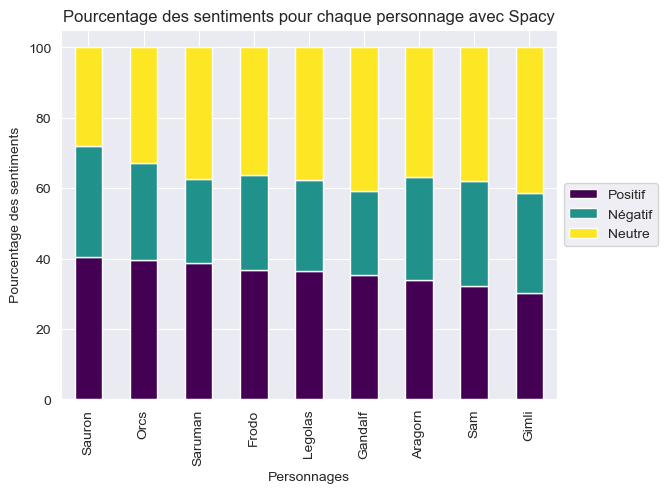

In [11]:
# Calculer les pourcentages des scores de sentiment pour chaque personnage
percentages = {}
for personnage, scores in sentiment_scores.items():
    total_scores = len(scores)
    positive_scores = len([score for score in scores if score > 0])
    negative_scores = len([score for score in scores if score < 0])
    neutral_scores = total_scores - positive_scores - negative_scores
    
    positive_percentage = (positive_scores / total_scores) * 100
    negative_percentage = (negative_scores / total_scores) * 100
    neutral_percentage = (neutral_scores / total_scores) * 100
    
    percentages[personnage] = {
        "Positif": positive_percentage,
        "Négatif": negative_percentage,
        "Neutre": neutral_percentage
    }
# Créer un DataFrame pandas à partir du dictionnaire des pourcentages
df = pd.DataFrame.from_dict(percentages, orient="index")

# Trier le DataFrame par ordre décroissant de la moyenne de sentiment positif
df = df.sort_values(by="Positif", ascending=False)

# Transposer le DataFrame pour inverser abscisse et ordonnée
df_transposed = df.T

st.bar_chart(df)
# Créer le graphique en barres
df.plot(kind="bar", stacked=True, colormap="viridis")
plt.xlabel("Personnages")
plt.ylabel("Pourcentage des sentiments")
plt.title("Pourcentage des sentiments pour chaque personnage avec Spacy")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()